In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("amazon_sales_dataset.csv")

In [4]:
sns.set(style="white")

In [5]:
df

,order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue
0,1,2022-04-13,2637,Books,128.75,10,4,North America,UPI,3.5,443,115.88,463.52
1,2,2023-03-12,2300,Fashion,302.60,20,5,Asia,Credit Card,3.7,475,242.08,1210.40
2,3,2022-09-28,3670,Sports,495.80,20,2,Europe,UPI,4.4,183,396.64,793.28
3,4,2022-04-17,2522,Books,371.95,15,4,Middle East,UPI,5.0,212,316.16,1264.64
4,5,2022-03-13,1717,Beauty,201.68,0,4,Middle East,UPI,4.6,308,201.68,806.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,2022-09-03,1433,Beauty,26.99,0,5,Middle East,Credit Card,2.4,386,26.99,134.95
49996,49997,2022-07-03,1428,Beauty,294.23,10,5,Asia,Credit Card,3.1,8,264.81,1324.05
49997,49998,2023-02-17,4651,Electronics,352.11,30,4,Asia,Debit Card,3.1,104,246.48,985.92
49998,49999,2022-09-30,4371,Beauty,307.54,5,1,Middle East,UPI,1.8,316,292.16,292.16


In [6]:
#checking data types
df.dtypes

order_id              int64
order_date           object
product_id            int64
product_category     object
price               float64
discount_percent      int64
quantity_sold         int64
customer_region      object
payment_method       object
rating              float64
review_count          int64
discounted_price    float64
total_revenue       float64
dtype: object

In [7]:
#converting from object to datetime 
df["order_date"]= pd.to_datetime(df["order_date"])

In [8]:
#checking for null values
df.isnull().sum()

order_id            0
order_date          0
product_id          0
product_category    0
price               0
discount_percent    0
quantity_sold       0
customer_region     0
payment_method      0
rating              0
review_count        0
discounted_price    0
total_revenue       0
dtype: int64

In [9]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

In [10]:
#Validate Pricing Columns
df.assign(calculated_discount = df["price"] * (1- df["discount_percent"]/100).round(2))

,order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue,calculated_discount
0,1,2022-04-13,2637,Books,128.75,10,4,North America,UPI,3.5,443,115.88,463.52,115.8750
1,2,2023-03-12,2300,Fashion,302.60,20,5,Asia,Credit Card,3.7,475,242.08,1210.40,242.0800
2,3,2022-09-28,3670,Sports,495.80,20,2,Europe,UPI,4.4,183,396.64,793.28,396.6400
3,4,2022-04-17,2522,Books,371.95,15,4,Middle East,UPI,5.0,212,316.16,1264.64,316.1575
4,5,2022-03-13,1717,Beauty,201.68,0,4,Middle East,UPI,4.6,308,201.68,806.72,201.6800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,2022-09-03,1433,Beauty,26.99,0,5,Middle East,Credit Card,2.4,386,26.99,134.95,26.9900
49996,49997,2022-07-03,1428,Beauty,294.23,10,5,Asia,Credit Card,3.1,8,264.81,1324.05,264.8070
49997,49998,2023-02-17,4651,Electronics,352.11,30,4,Asia,Debit Card,3.1,104,246.48,985.92,246.4770
49998,49999,2022-09-30,4371,Beauty,307.54,5,1,Middle East,UPI,1.8,316,292.16,292.16,292.1630


In [11]:
#creating year column from order_date
df["year"]= df["order_date"].dt.year

In [12]:
#creating month column from order date
df["month"] = df["order_date"].dt.month

In [13]:
df["month_name"]= df["order_date"].dt.month_name()
df["week"]= df["order_date"].dt.day_name()

In [14]:
#checking for uniuqe values
df["product_category"].unique()

array(['Books', 'Fashion', 'Sports', 'Beauty', 'Electronics',
       'Home & Kitchen'], dtype=object)

In [15]:
#checking for uniuqe values
df["payment_method"].unique()

array(['UPI', 'Credit Card', 'Wallet', 'Cash on Delivery', 'Debit Card'],
      dtype=object)

In [16]:
#Total Revenue by Category 
df.groupby("product_category")["total_revenue"].agg(average_revenue = "mean")

,average_revenue
product_category,
Beauty,655.714704
Books,658.684164
Electronics,657.523321
Fashion,655.125325
Home & Kitchen,662.767323
Sports,654.233009


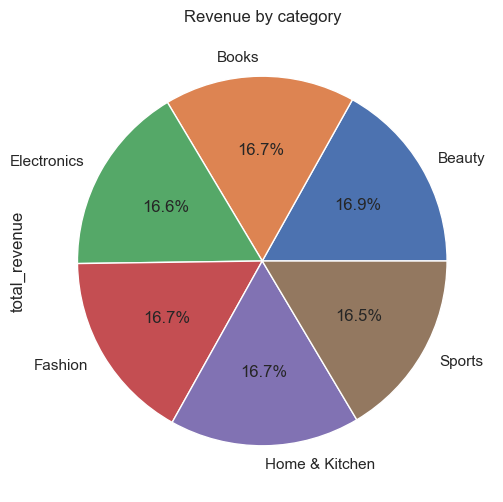

In [17]:
revenue_by_category= df.groupby("product_category")["total_revenue"].sum()
revenue_by_category.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Revenue by category")
plt.show()

In [18]:
#Total Prodcuts sold by category
products_sold_category= df.groupby("product_category")["quantity_sold"].sum().sort_values()
products_sold_category

product_category
Home & Kitchen    24743
Sports            24753
Electronics       24898
Books             25065
Fashion           25089
Beauty            25422
Name: quantity_sold, dtype: int64

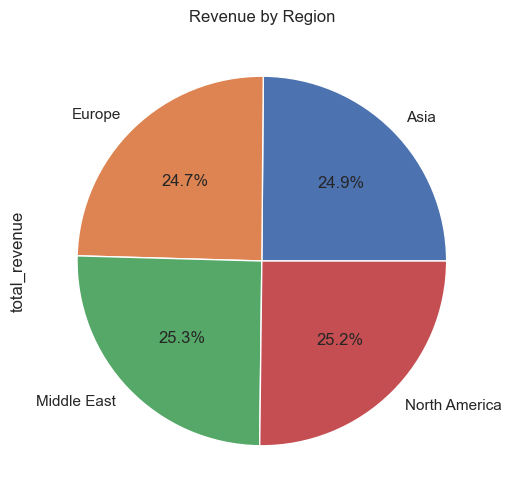

In [19]:
#revenue by Region
region_revenue= df.groupby("customer_region")["total_revenue"].sum()

region_revenue.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Revenue by Region")
plt.show()

In [20]:
#products sold by region 
df.groupby("customer_region")["quantity_sold"].sum()

customer_region
Asia             37440
Europe           37302
Middle East      37694
North America    37534
Name: quantity_sold, dtype: int64

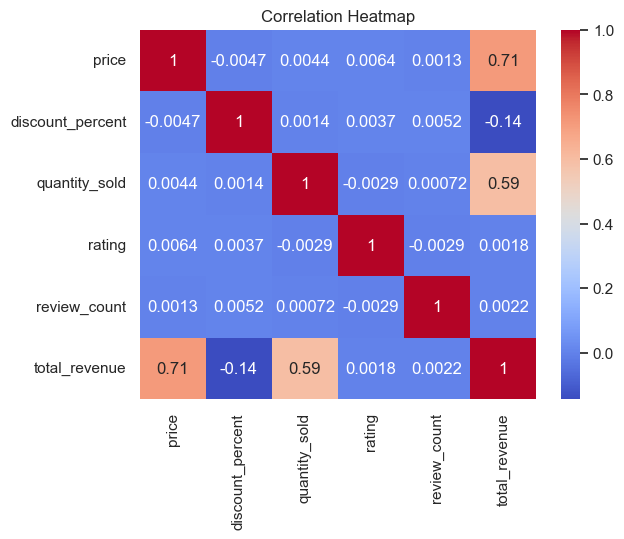

In [21]:
num_cols = [
    'price','discount_percent','quantity_sold',
    'rating','review_count','total_revenue'
]

sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [22]:
df.head()

,order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue,year,month,month_name,week
0,1,2022-04-13,2637,Books,128.75,10,4,North America,UPI,3.5,443,115.88,463.52,2022,4,April,Wednesday
1,2,2023-03-12,2300,Fashion,302.60,20,5,Asia,Credit Card,3.7,475,242.08,1210.40,2023,3,March,Sunday
2,3,2022-09-28,3670,Sports,495.80,20,2,Europe,UPI,4.4,183,396.64,793.28,2022,9,September,Wednesday
3,4,2022-04-17,2522,Books,371.95,15,4,Middle East,UPI,5.0,212,316.16,1264.64,2022,4,April,Sunday
4,5,2022-03-13,1717,Beauty,201.68,0,4,Middle East,UPI,4.6,308,201.68,806.72,2022,3,March,Sunday


In [23]:
#Average Rating by Products_category
df.groupby("product_category")["rating"].mean()

product_category
Beauty            2.985186
Books             3.020259
Electronics       2.991298
Fashion           2.987782
Home & Kitchen    2.996706
Sports            2.996891
Name: rating, dtype: float64

In [24]:
#Revenue by payment_method
df.groupby("payment_method")["total_revenue"].agg(total_revenue= "sum",
                                                  average_revenue = "mean")

,total_revenue,average_revenue
payment_method,,
Cash on Delivery,6546386.94,659.452699
Credit Card,6540087.16,660.081465
Debit Card,6522019.73,653.443516
UPI,6579441.44,652.851899
Wallet,6678638.47,660.858744


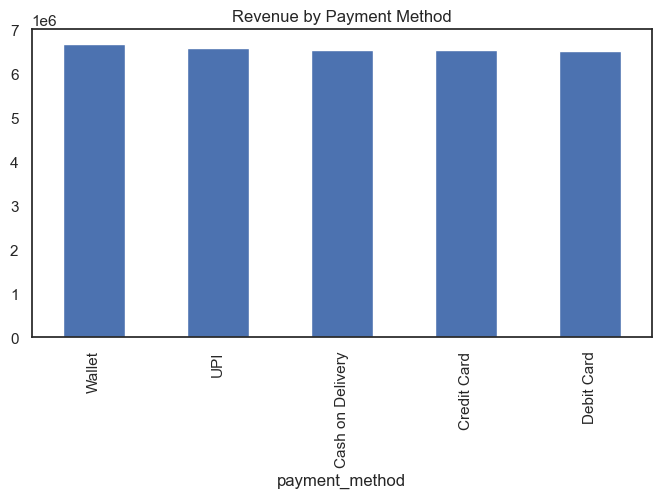

In [25]:
payment_revenue = df.groupby("payment_method")["total_revenue"].sum().sort_values(ascending= False)

payment_revenue.plot(kind='bar', figsize=(8,4))
plt.title("Revenue by Payment Method")
plt.show()

In [26]:
#average ratings by region
df.groupby("customer_region")["rating"].mean()

customer_region
Asia             2.995721
Europe           2.973651
Middle East      3.015434
North America    3.000360
Name: rating, dtype: float64

In [27]:
#year wise Revenue 
df.groupby("year")["total_revenue"].sum()

year
2022    16389404.56
2023    16477169.18
Name: total_revenue, dtype: float64

In [28]:
#montlhy sales in 2022
df[df["year"]==2022].groupby("month_name")["total_revenue"].agg(total_revenue="sum")

,total_revenue
month_name,
April,1371955.83
August,1449308.06
December,1386209.61
February,1266714.29
January,1419751.89
July,1346089.18
June,1352125.49
March,1392585.42
May,1374779.57


In [29]:
#montlhy sales in 2023
df[df["year"]==2023].groupby("month_name")["total_revenue"].agg(total_revenue="sum")

,total_revenue
month_name,
April,1307017.94
August,1396321.88
December,1335185.33
February,1238380.51
January,1464174.99
July,1442176.66
June,1394822.13
March,1366418.41
May,1431398.77


In [30]:
#Orders by weekday
df.groupby("week")["order_id"].sum()

week
Friday       183031656
Monday       179137558
Saturday     176189881
Sunday       180541174
Thursday     179011561
Tuesday      177046396
Wednesday    175066774
Name: order_id, dtype: int64

In [31]:
df["discount_percent"].unique()

array([10, 20, 15,  0, 30,  5])

In [32]:
#creating discount buckets 
bins = [0,10,20,30]
labels = ["low","medium","high"]

df["discount_group"]= pd.cut(df["discount_percent"], bins=bins , labels = labels, include_lowest=True)
df["discount_group"]

0           low
1        medium
2        medium
3        medium
4           low
          ...  
49995       low
49996       low
49997      high
49998       low
49999      high
Name: discount_group, Length: 50000, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [33]:
#creating price buckets 
labels = ["low","affordable","high","premium"]
df["price_group"]= pd.qcut(df["price"], q= 4, labels= labels)
df["price_group"]

0        affordable
1              high
2           premium
3              high
4        affordable
            ...    
49995           low
49996          high
49997          high
49998          high
49999          high
Name: price_group, Length: 50000, dtype: category
Categories (4, object): ['low' < 'affordable' < 'high' < 'premium']

In [34]:
#creating review groups 
labels = ["low","average","high"]
df["review_group"]= pd.qcut(df["rating"] , q=3 , labels= labels)
df["review_group"]

0        average
1        average
2           high
3           high
4           high
          ...   
49995    average
49996    average
49997    average
49998        low
49999        low
Name: review_group, Length: 50000, dtype: category
Categories (3, object): ['low' < 'average' < 'high']

In [35]:
#rating vs revenue
rating_revenue = df.groupby("review_group", observed=False)["total_revenue"].sum()
rating_revenue

review_group
low        11224174.54
average    11318505.17
high       10323894.03
Name: total_revenue, dtype: float64